In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas import Series, DataFrame, Panel

%matplotlib inline

path = "D://OneDrive//Projects//BristolUNI-AdvancedComputing(ML,DM,HPC)//AppliedDataScience//EnvironmentalThreads//Data//"
water_filename = path + "water_quality.csv"
flood_filename = path + "flood.csv"

water_data = pd.read_csv(water_filename)
flood_data = pd.read_csv(flood_filename)

Here, we convert time format from timestamp to date (YYYY-mm-dd)

GB109053027371
http://environment.data.gov.uk/catchment-planning/WaterBody/GB109053027371

Bristol Avon (By Bk to Netham Weir)

In [4]:
def convertDatetimeandFormat(data, column):
    data[column]=pd.to_datetime(data[column])
    data[column] = data[column].dt.strftime('%Y-%m-%d')
    return data

In [6]:
water_data = convertDatetimeandFormat(water_data, 'sample.sampleDateTime')


Here, we try to analyze the correlation between **water flow and BOD ATU** for a single water body (GB109053027371).

In [8]:
water_df = water_data[['determinand.label', 'sample.sampleDateTime','result', 
                      'determinand.unit.label','stationReference', 'Waterbody ID','water body']]

sensors = ['GB109053027371', 'GB109053027820']
filtered_water_df = water_df.loc[(water_df['Waterbody ID'] == sensors[0])
                                 & (water_df['determinand.label'] == 'BOD ATU' ) ]

filtered_water_df_amonia = water_df.loc[(water_df['Waterbody ID'] == sensors[0])
                                 & (water_df['determinand.label'] == 'Ammonia(N)' )]

filtered_water_df_temp_water = water_df.loc[(water_df['Waterbody ID'] == sensors[0])
                                 & (water_df['determinand.label'] == 'Temp Water' )]

filtered_water_df_NOxidised = water_df.loc[(water_df['Waterbody ID'] == sensors[0])
                                 & (water_df['determinand.label'] == 'N Oxidised' )]

variables = ['Ammonia(N)', 'N Oxidised', 'Nitrate-N', 'Nitrite-N', 'Orthophospht', 'pH', 'Temp Water', 'BOD ATU']

filtered_water_df_all = []
for x in variables:
    filtered_df = water_df.loc[(water_df['Waterbody ID'] == sensors[0]) & (water_df['determinand.label'] == x) ]
    w_grouped = filtered_df.groupby(['sample.sampleDateTime'])['result'].mean()
    filtered_water_df_all.insert(len(filtered_water_df), w_grouped)
    
    
filtered_water_df_all_sensor2 = []
for x in variables:
    filtered_df = water_df.loc[(water_df['Waterbody ID'] == sensors[1]) & (water_df['determinand.label'] == x) ]
    w_grouped = filtered_df.groupby(['sample.sampleDateTime'])['result'].mean()
    filtered_water_df_all_sensor2.insert(len(filtered_water_df), w_grouped)

In [10]:
filtered_water_df_all

[sample.sampleDateTime
 2016-07-12    4.61
 2016-08-07    2.64
 2016-09-07    2.91
 2016-09-26    9.17
 Name: result, dtype: float64, sample.sampleDateTime
 2016-07-15    2.66
 2016-08-16    2.02
 2016-09-26    1.61
 Name: result, dtype: float64, sample.sampleDateTime
 2016-07-15    2.66
 2016-08-16    2.02
 2016-09-26    1.61
 Name: result, dtype: float64, sample.sampleDateTime
 2016-07-15    0.004
 2016-08-16    0.004
 2016-09-26    0.004
 Name: result, dtype: float64, Series([], Name: result, dtype: float64), sample.sampleDateTime
 2016-07-12    7.68
 2016-08-07    7.40
 2016-09-07    6.85
 2016-09-26    7.65
 Name: result, dtype: float64, Series([], Name: result, dtype: float64), sample.sampleDateTime
 2016-07-12     9.0
 2016-07-13    12.0
 2016-07-29    18.0
 2016-08-07     9.0
 2016-08-08    12.0
 2016-08-17     9.0
 2016-09-07     9.0
 2016-09-08    14.0
 2016-09-26    15.0
 2016-09-27    15.0
 Name: result, dtype: float64]

group by 'sample.sampleDateTime','Waterbody ID','determinand.label'

This command is able to get the mean number of pollution variables of each waterbody ID every day.

In [12]:
#print(w_grouped.apply(lambda g: g[g['determinand.label'] == 'Ammonia(N)']))
w_grouped = filtered_water_df.groupby(['sample.sampleDateTime'])['result'].mean()
# w_grouped_a = filtered_water_df_amonia.groupby(['sample.sampleDateTime'])['result'].mean()
# w_grouped_temp_water = filtered_water_df_temp_water.groupby(['sample.sampleDateTime'])['result'].mean()
# w_grouped_temp_NOxydised = filtered_water_df_NOxidised.groupby(['sample.sampleDateTime'])['result'].mean()

In [14]:
flood_df = flood_data[['date', 'value','Waterbody ID']]
filtered_flood_df = flood_df.loc[flood_df['date'].isin(w_grouped.index.get_level_values('sample.sampleDateTime').tolist())]

f_grouped = filtered_flood_df.groupby(['date'])['value'].mean()
f_grouped

date
2016-07-12    5.452769
2016-07-13    5.336615
2016-07-29    4.604308
2016-08-07    4.427692
2016-08-08    3.956757
2016-08-17    3.341231
2016-09-07    4.070000
2016-09-08    3.638923
2016-09-26    3.870462
2016-09-27    3.685231
Name: value, dtype: float64

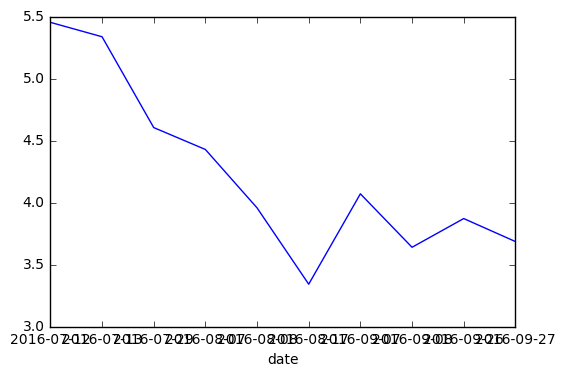

In [16]:
f_grouped.plot()

In [17]:
['Ammonia(N)', 'N Oxidised', 'Nitrate-N', 'Nitrite-N', 'Orthophospht', 'pH', 'Temp Water', 'BOD ATU']
joint_df = DataFrame({
        '1 FLOW' : f_grouped,
        '2 Ammonia(N)' : filtered_water_df_all[0],
        '3 N Oxidised' : filtered_water_df_all[1],
        '4 Nitrate-N' : filtered_water_df_all[2],
        '5 pH' : filtered_water_df_all[5],
        '6 BOD ATU' : filtered_water_df_all[7]})#'4 Temp Water' : w_grouped_temp_water

joint_df_sensor2 = DataFrame({
        '1 FLOW' : f_grouped,
        '2 Ammonia(N)' : filtered_water_df_all_sensor2[0],
        '3 N Oxidised' : filtered_water_df_all_sensor2[1],
        '4 Nitrate-N' : filtered_water_df_all_sensor2[2],
        '5 pH' : filtered_water_df_all_sensor2[5],
        '6 BOD ATU' : filtered_water_df_all[7]})#'4 Temp Water' : w_grouped_temp_water
joint_df_sensor2

,1 FLOW,2 Ammonia(N),3 N Oxidised,4 Nitrate-N,5 pH,6 BOD ATU
2016-07-05,NaN,0.0300,2.110000,2.100000,NaN,NaN
2016-07-12,5.452769,NaN,NaN,NaN,NaN,9.0
2016-07-13,5.336615,0.0300,1.905000,1.890000,8.28,12.0
2016-07-21,NaN,0.0390,1.115000,1.106500,8.05,NaN
2016-07-26,NaN,0.0300,1.820000,1.810000,NaN,NaN
2016-07-29,4.604308,NaN,NaN,NaN,NaN,18.0
2016-08-05,NaN,0.0495,1.625000,1.615000,8.14,NaN
2016-08-07,4.427692,NaN,NaN,NaN,NaN,9.0
2016-08-08,3.956757,NaN,NaN,NaN,NaN,12.0
2016-08-11,NaN,0.0300,1.400000,1.400000,NaN,NaN


Plot the relation.
kind=
- ‘kde’ : Kernel Density Estimation plot
- ‘barh’ : horizontal bar plot
- ‘line’ : line plot (default)

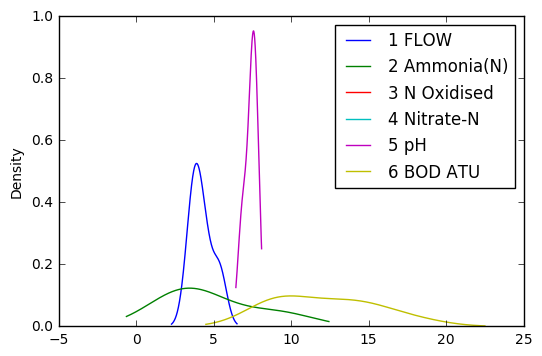

In [18]:
joint_df.plot(kind='kde')

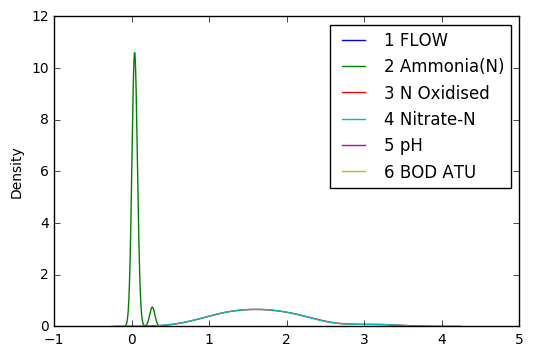

In [19]:
joint_df_sensor2.plot(kind='kde')

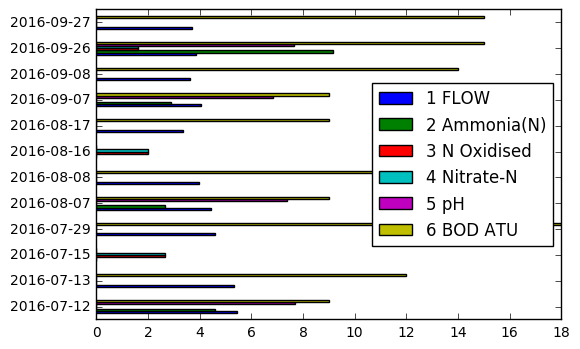

In [21]:
joint_df.plot(kind='barh')

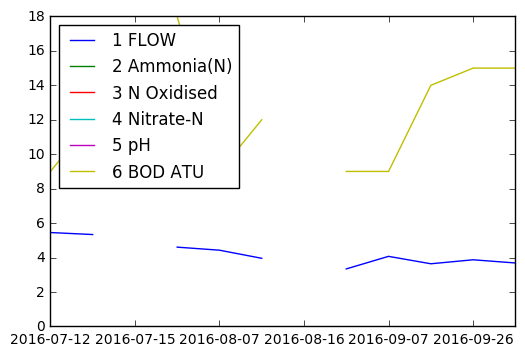

In [23]:
joint_df.plot(kind='line')

KeyError: 'BOD ATU'

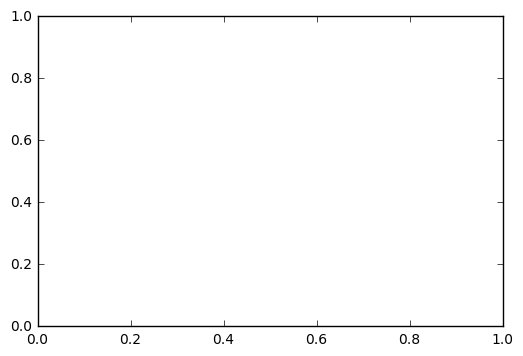

In [25]:
joint_df.plot(kind='scatter', x='BOD ATU', y='FLOW');

In [28]:
joint_df.corr(method='pearson')

,1 FLOW,2 Ammonia(N),3 N Oxidised,4 Nitrate-N,5 pH,6 BOD ATU
1 FLOW,1.000000,-0.306925,NaN,NaN,0.425036,-0.134560
2 Ammonia(N),-0.306925,1.000000,NaN,NaN,0.597022,0.957413
3 N Oxidised,NaN,NaN,1.0,1.0,NaN,NaN
4 Nitrate-N,NaN,NaN,1.0,1.0,NaN,NaN
5 pH,0.425036,0.597022,NaN,NaN,1.000000,0.442243
6 BOD ATU,-0.134560,0.957413,NaN,NaN,0.442243,1.000000
